# Dataset Analysis

This notebook analysis a given dataset.

Global variables.

In [1]:
path = '/data/nir_data/2017_05_22/NoSpectralCorrection/ShuffeledSpectra/HyperspectralDataNir20170522.hdf5'
hist_bins = 256
batchsize = 1024*1024*8

Dependencies.

In [2]:
from h5py import File as h5file
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/sflorian92/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Loading.

In [3]:
file = h5file(path, 'r')
data = file['data']
iterations = (data.shape[0] // batchsize) + 1

First pass.

In [4]:
data_min = 1000
data_max = -1000

In [5]:
for i in range(iterations):
    sample = data[i*batchsize:(i+1)*batchsize]
    data_min = min(np.min(sample), data_min)
    data_max = max(np.max(sample), data_max)

Second pass.

In [6]:
hist_edges = np.linspace(data_min, data_max, hist_bins)
hist_buffer = np.zeros(hist_edges.shape[0]-1, dtype=int)

In [7]:
for i in range(iterations):
    sample = data[i*batchsize:(i+1)*batchsize]
    tmp_hist, _ = np.histogram(sample, bins=hist_edges)
    hist_buffer += tmp_hist

In [8]:
hist_sum = hist_buffer.sum()
hist_means = 0.5 * (hist_edges[1:] + hist_edges[:-1])
mean = (hist_means * hist_buffer).sum() / hist_sum
variance = ((hist_means-mean)**2 * hist_buffer).sum() / hist_sum
sigma = variance ** 0.5

Show the results.

Min=0.0 Max=255.0 Mean=40.9 Variance=1257.3 Sigma=35.5


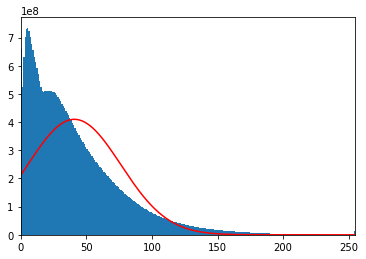

In [9]:
print('Min={:.1f} Max={:.1f} Mean={:.1f} Variance={:.1f} Sigma={:.1f}'.format(data_min, data_max, mean, variance, sigma))
plt.bar(hist_means, hist_buffer, width=(hist_edges[1]-hist_edges[0]))
plt.xlim(min(hist_edges), max(hist_edges))
plt.plot(hist_edges, hist_sum*plt.mlab.normpdf(hist_edges, mean, sigma), 'r-')
plt.show()